In [1]:
import pandas as pd
%load_ext rpy2.ipython

D:\Anaconda\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
def readMultilineFASTA(file):

	fh = open(file)

	name = None
	seq = ""


	for line in fh:
		if line.startswith(">"):
			if name:
				
				yield (name,seq)
				name = None
				seq = ""

			name = line.rstrip().lstrip(">")

		else:
			seq += line.rstrip()
			

	yield name,seq

In [3]:
def gc(seq):
    count = 0
    for c in seq:
        if c == "G" or c =="C":
            count += 1
    return count / len(seq)

In [21]:
file = "D:\Downloads\Mdomestica_491_v1.1.cds_primaryTranscriptOnly.fa"

d = {"seq_name":[],"seq_len":[]}
lst = [[],[],[]]


for name,seq in readMultilineFASTA(file):
    d["seq_name"].append(name.split()[0])
    d["seq_len"].append(len(seq))
    lst[0].append(name.split()[0])
    lst[1].append(len(seq))
    lst[2].append(gc(seq))
    
genes = pd.DataFrame(d)
genes.dtypes
geneLen = genes["seq_len"]

lens = lst[1]
gcp = lst[2]

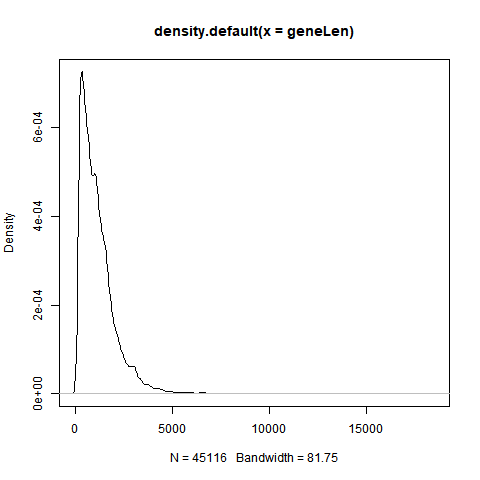

In [14]:
%%R -i geneLen
d<-density(geneLen)
plot(d)

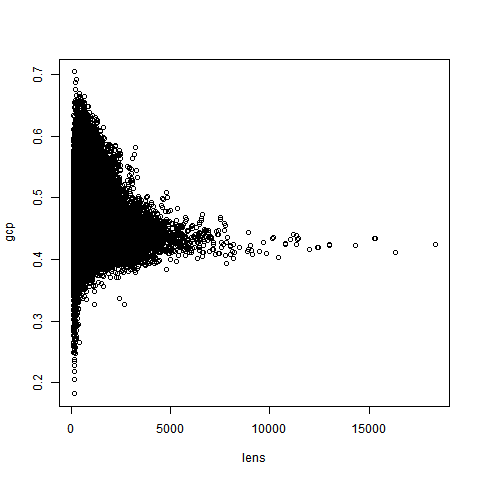

In [28]:
%%R -i lens,gcp
plot(lens,gcp,type="p")

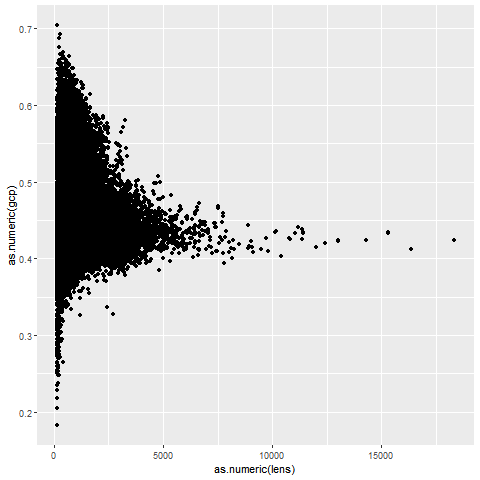

In [42]:
%%R -i lens,gcp
library(ggplot2)
ggplot() + geom_point(aes(x=as.numeric(lens),y=as.numeric(gcp),z=1))
#The reason this didn't work before is because of the vector format during the import step
#The vector format for the lists was a "factor" vector, when it needed to be numeric. 
#Using "as.numeric" forces a conversion and allows us to plot the data
